In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("data/regression_part1.csv")

In [5]:
df.head()

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [6]:
df.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [8]:
n, d = df.shape

In [12]:
X = np.column_stack((np.ones(n), df.revision_time))

In [14]:
y = df.exam_score

In [15]:
model = LinearRegression(fit_intercept = False)

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [28]:
coeffs = model.coef_
coeffs

array([17.89768026,  1.44114091])

In [29]:
import matplotlib.pyplot as plt

In [31]:
xplot = np.linspace(0, 50, 200)
yplot = list(map(lambda x: coeffs[0] + coeffs[1]*x, xplot))

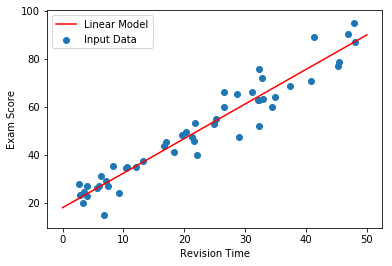

In [41]:
plt.plot(xplot, yplot, color = 'r', label="Linear Model")
plt.scatter(df.revision_time, df.exam_score, label="Input Data")

plt.xlabel("Revision Time")
plt.ylabel("Exam Score")
plt.legend()